### Computational Economics
Alexander Skorobogatov

# Information for the projects

Work is to be done by a group of 1-4 persons.  

Choose an academic or applied problem and solve this using functions of Python, including its libraries such as numpy, pandas, sympy, etc.  
    
Examples of academic problems  
* Take a model from a micro- or macroeconomics textbook, provide its setup and analytical solution using sympy, illustrate this numerically using numpy and/or pandas, and vizualize your analysis using matplotlib. For example of this work, see [here](https://github.com/askorobogat/CompEcon/blob/main/Seminar%204.2_assignments.ipynb).  
* Take a panel or time series dataset and analyze this using Markov chains toolkit and the respective Python libraries (example of the task is [here](https://github.com/askorobogat/CompEcon/blob/main/Seminar%203.1_assignments.ipynb)).  
* Take a time series dataset and analyze this using SVAR and the respective Python libraries (example of the task is [here](https://github.com/askorobogat/CompEcon/blob/main/Topic%206.1%20SVAR.ipynb)).  
    
Examples of applied problems  
* Take a piece of data of your own choice (from the Internet, a PDF file) which needs extensive manipulations using numpy/pandas to make it analyzable as a standard table. The more manipulations, the better.
* Take business reports of a company, e.g., [this](https://www.nornickel.ru/upload/iblock/53b/k7mqjhb1n9o0y8eieu0adzgn3b98z8xg/NN_AR_2021_Book_RUS_26.09.22.pdf), choose a table reported annually, read this for all the available years in Python and combine in one table.

Criteria of a good job

1. An extensive use of the material covered in the course;
2. But your operations do not reduce to copying codes from seminars/lectures.When needed you may do the same by your own;
3. If you implement some libraries/ideas/skills going beyond the course this is your advantage;
4. The more persons involved, the higher the requirements to the quantity/quality of the work done.

Format and submit

Format you work as a Jupiter notebook, put the names of all the participants, and send me to [the telegram](https://t.me/al_askorobogatov).

Deadline -- October 24.

In [1]:
from sympy import *
import matplotlib.pyplot as pl

In [2]:
x1, x2, w1, w2, y, a, b  = symbols('x1, x2, w1, w2, y, a, b')
l = Symbol("\lambda")
mi = Symbol("\min")
f = Function("f")(x1,x2)
mini = w1*x1 + w2*x2
pf = (x1**a) * (x2**b)
eq = Eq(f, pf)
eq

Eq(f(x1, x2), x1**a*x2**b)

In [3]:
# Лагранжан
L = mini - l * (pf - y)
d_x1 = solve(Eq(diff(L,x1),0),w1)[0]
d_x2 = solve(Eq(diff(L,x2),0),w2)[0]
d_lambd = solve(Eq(diff(L,l),0),y)[0]


eq_x1 = Eq(w1, d_x1)
eq_x2 = Eq(w2, d_x2)
eq_lambd = Eq(y, d_lambd)
eq_lambd

eq1_x1 = Eq(w1*x1, d_x1*x1).simplify()
eq1_x1 = eq1_x1.subs((x1**a) * (x2**b), y)
eq1_x2 = Eq(w2*x2, d_x2*x2).simplify()
eq1_x2 = eq1_x2.subs((x1**a) * (x2**b), y)

x1_s = solve(eq1_x1, x1)[0]
x2_s = solve(eq1_x2, x2)[0]
x1_s

\lambda*a*y/w1

In [4]:
y_s = d_lambd.subs([(x1, solve(eq1_x1, x1)[0]),(x2, solve(eq1_x2, x2)[0])])
eq_y = Eq(y_s, y)
eq_y

Eq((\lambda*a*y/w1)**a*(\lambda*b*y/w2)**b, y)

In [5]:
lamda_eq = solve(y_s - y, l)[0]
d = Eq(lamda_eq, l)
# d
# lamda_eq = simplify(eq_y)
# lamda_eq


In [6]:
y_s - y

-y + (\lambda*a*y/w1)**a*(\lambda*b*y/w2)**b

In [7]:
x1 = Function("x1")(w1,w2,y)
x2 = Function("x2")(w1,w2,y)

In [8]:
res_x1 = x1_s.subs(l, lamda_eq)
res_x2 = x2_s.subs(l, lamda_eq)
x1_res = Eq(x1, res_x1)
x2_res = Eq(x2, res_x2)

In [9]:
x1_res

Eq(x1(w1, w2, y), a*y*exp((log(y) + log(a**(-a)*b**(-b)*w1**a*w2**b*y**(-a - b)))/(a + b))/w1)

In [10]:
x2_res


Eq(x2(w1, w2, y), b*y*exp((log(y) + log(a**(-a)*b**(-b)*w1**a*w2**b*y**(-a - b)))/(a + b))/w2)

In [11]:
c = Function("c")(w1,w2,y)
cs = w1*x1 + w2*x2
c_eq = Eq(c, cs)

In [12]:
c_eq

Eq(c(w1, w2, y), w1*x1(w1, w2, y) + w2*x2(w1, w2, y))

In [13]:
res_c = c_eq.subs([(x1,res_x1), (x2, res_x2)]).simplify()

In [14]:
res_c

Eq(c(w1, w2, y), y*(a + b)*exp((log(y) + log(a**(-a)*b**(-b)*w1**a*w2**b*y**(-a - b)))/(a + b)))

In [15]:
res_x1

a*y*exp((log(y) + log(a**(-a)*b**(-b)*w1**a*w2**b*y**(-a - b)))/(a + b))/w1

In [16]:
x_1 = res_x1.subs([(𝑎,1/2),(𝑏,2/3)])
x_1

0.848411284308222*y**1.85714285714286*(w1**0.5*w2**0.666666666666667*y**(-1.16666666666667))**0.857142857142857/w1

In [17]:
# Числовой пример
# w1 = 2, w2 = 7, a = 1/2, b = 2/3, y = 1, 

x1, x2, w1, w2, y, a, b, k  = symbols('x1, x2, w1, w2, y, a, b, k')

a = 1/2
b = 2/3
costs = 2*x1 + 7* x2
f1 = 54*(x1**a) * (x2**b)
costs_eq = Eq(costs)
f1_eq = Eq(f1, 1)
f1_eq


/Users/kirill/opt/anaconda3/lib/python3.8/site-packages/sympy/core/relational.py:495: SymPyDeprecationWarning: 

Eq(expr) with rhs default to 0 has been deprecated since SymPy 1.5.
Use Eq(expr, 0) instead. See
https://github.com/sympy/sympy/issues/16587 for more info.

  SymPyDeprecationWarning(


Eq(54*x1**0.5*x2**0.666666666666667, 1)

In [35]:
# Лагранжан
L = costs - l*(f1 - 1)
d_x1 = solve(Eq(diff(L,x1),0),l)[0]
d_x2 = solve(Eq(diff(L,x2),0),l)[0]
d_lambd = solve(Eq(diff(L,l),0), x1)[0]

m = Eq(d_x1,d_x2)
x2_res_primer = solve(m.subs(x1, d_lambd), x2)[0]
x1_res_primer = d_lambd.subs(x2, x2_res_primer)
x1_res_primer
x2_res_primer

0.0216503148681957

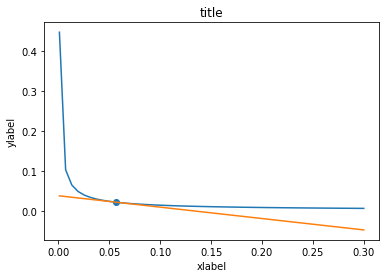

In [50]:
# plot
k = Symbol('k')

import numpy as np
import pandas as pd
isokv = solve(f1_eq, x2)[0]
isokvanta = Eq(x2, isokv)
isokvanta
x12 = np.linspace(0.001,0.3)


x1_list = []
x2_list = []

for i in range(len(x12)):
    x11 = x12[i]
    x1_list.append(x11)
    x222 = 0.00252005117570286/(x11**(3/4))
    x2_list.append(x222)
    
dat_1 = {'x1':x1_list, 'x2':x2_list}

data_1 = pd.DataFrame(dat_1)
data_1.set_index("x1", inplace = True)
data_1



isokosta = Eq((-w1/w2)*x1 + k, x2)
res_k = solve(isokosta.subs([(w1,2),(w2,7),(x1,x1_res_primer),(x2, x2_res_primer)]), k)[0]
res_k


x1_1 = np.linspace(0.001,0.3)


x11_list = []
x22_list = []

for i in range(len(x1_1)):
    x111 = x1_1[i]
    x11_list.append(x111)
    x222 = -2/7*x111 + res_k
    x22_list.append(x222)
    
dat_2 = {'x1':x11_list, 'x2':x22_list}

data_2 = pd.DataFrame(dat_2)
data_2.set_index("x1", inplace = True)
data_2

import matplotlib.pyplot as plt




pl1, pl2 = plt.subplots()
pl1 = plt.plot(data_1['x2'], label = "line1")
pl2 = plt.plot(data_2['x2'], label = "line 2")
p13 = plt.scatter(x1_res_primer, x2_res_primer)

plt.title("title")
plt.xlabel("xlabel")
plt.ylabel("ylabel")

plt.show()
# data_